In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings

In [6]:
data= pd.read_csv("C:\\Users\\DELL\\Desktop\\Data_file.xlsx - Data.csv", skiprows=2)
data.drop('S.No.', axis=1, inplace = True)
data

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"
...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40"
1334,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75"
1335,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77"
1336,Tier 1,Executive,Non-Metro,"53,203.00",3,69,21,"64,044.38"


In [7]:
data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"


In [76]:
data.shape

(1338, 15)

In [77]:
data.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
Tier 1                  0
Tier 2                  0
Tier 3                  0
Executive               0
Manager                 0
Metro                   0
Non-Metro               0
dtype: int64

In [12]:
data.describe

<bound method NDFrame.describe of      College       Role  City type  Previous CTC  Previous job changes  \
0     Tier 1    Manager  Non-Metro    55,523.00                      3   
1     Tier 2  Executive      Metro    57,081.00                      1   
2     Tier 2  Executive      Metro    60,347.00                      2   
3     Tier 3  Executive      Metro    49,010.00                      2   
4     Tier 3  Executive      Metro    57,879.00                      4   
...      ...        ...        ...           ...                   ...   
1333  Tier 3  Executive      Metro    59,661.00                      4   
1334  Tier 1  Executive  Non-Metro    53,714.00                      1   
1335  Tier 2  Executive  Non-Metro    61,957.00                      1   
1336  Tier 1  Executive  Non-Metro    53,203.00                      3   
1337  Tier 3    Manager  Non-Metro    51,820.00                      1   

      Graduation marks  Exp (Months)           CTC  
0                   66  

In [9]:
data.dtypes

College                 object
Role                    object
City type               object
Previous CTC            object
Previous job changes     int64
Graduation marks         int64
Exp (Months)             int64
CTC                     object
dtype: object

In [11]:
data.describe(include='all')

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338,1338,1338,1338,1338.000000,1338.000000,1338.000000,1338
unique,3,2,2,1308,NaN,NaN,NaN,1338
top,Tier 1,Executive,Metro,"53,160.00",NaN,NaN,NaN,"71,406.58"
freq,649,1064,676,2,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,2.525411,59.890882,39.207025,NaN
std,NaN,NaN,NaN,NaN,1.123502,14.894696,14.049960,NaN
min,NaN,NaN,NaN,NaN,1.000000,35.000000,18.000000,NaN
25%,NaN,NaN,NaN,NaN,2.000000,47.000000,27.000000,NaN
50%,NaN,NaN,NaN,NaN,3.000000,60.000000,39.000000,NaN
75%,NaN,NaN,NaN,NaN,4.000000,73.000000,51.000000,NaN


In [14]:
data.count()

College                 1338
Role                    1338
City type               1338
Previous CTC            1338
Previous job changes    1338
Graduation marks        1338
Exp (Months)            1338
CTC                     1338
dtype: int64

In [34]:
# turn categorical variable into numarical varible
data1 = pd.concat([data, pd.get_dummies(data['College'])], axis=1)
data1 = pd.concat([data, pd.get_dummies(data['Role'])], axis=1)
data1 = pd.concat([data, pd.get_dummies(data['City type'])], axis=1)
data1

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Tier 1,Tier 2,Tier 3,Executive,Manager,Metro,Non-Metro,Metro,Non-Metro
0,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58",1,0,0,0,1,0,1,0,1
1,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87",0,1,0,1,0,1,0,1,0
2,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02",0,1,0,1,0,1,0,1,0
3,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39",0,0,1,1,0,1,0,1,0
4,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10",0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40",0,0,1,1,0,1,0,1,0
1334,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75",1,0,0,1,0,0,1,0,1
1335,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77",0,1,0,1,0,0,1,0,1
1336,Tier 1,Executive,Non-Metro,"53,203.00",3,69,21,"64,044.38",1,0,0,1,0,0,1,0,1


In [74]:
data1.dtypes

College                 object
Role                    object
City type               object
Previous CTC            object
Previous job changes     int64
Graduation marks         int64
Exp (Months)             int64
CTC                     object
Tier 1                   uint8
Tier 2                   uint8
Tier 3                   uint8
Executive                uint8
Manager                  uint8
Metro                    uint8
Non-Metro                uint8
Metro                    uint8
Non-Metro                uint8
dtype: object

<AxesSubplot:>

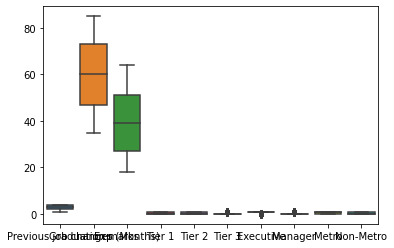

In [37]:
sns.boxplot(data=data)

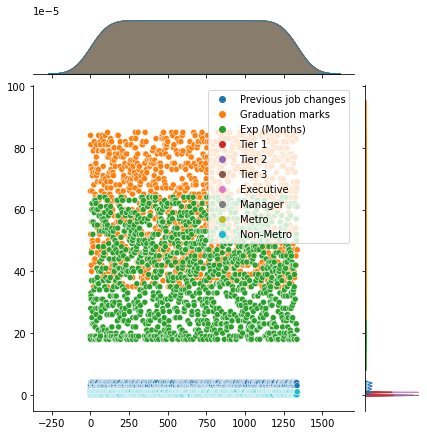

In [23]:
sns.jointplot(data1=data1)

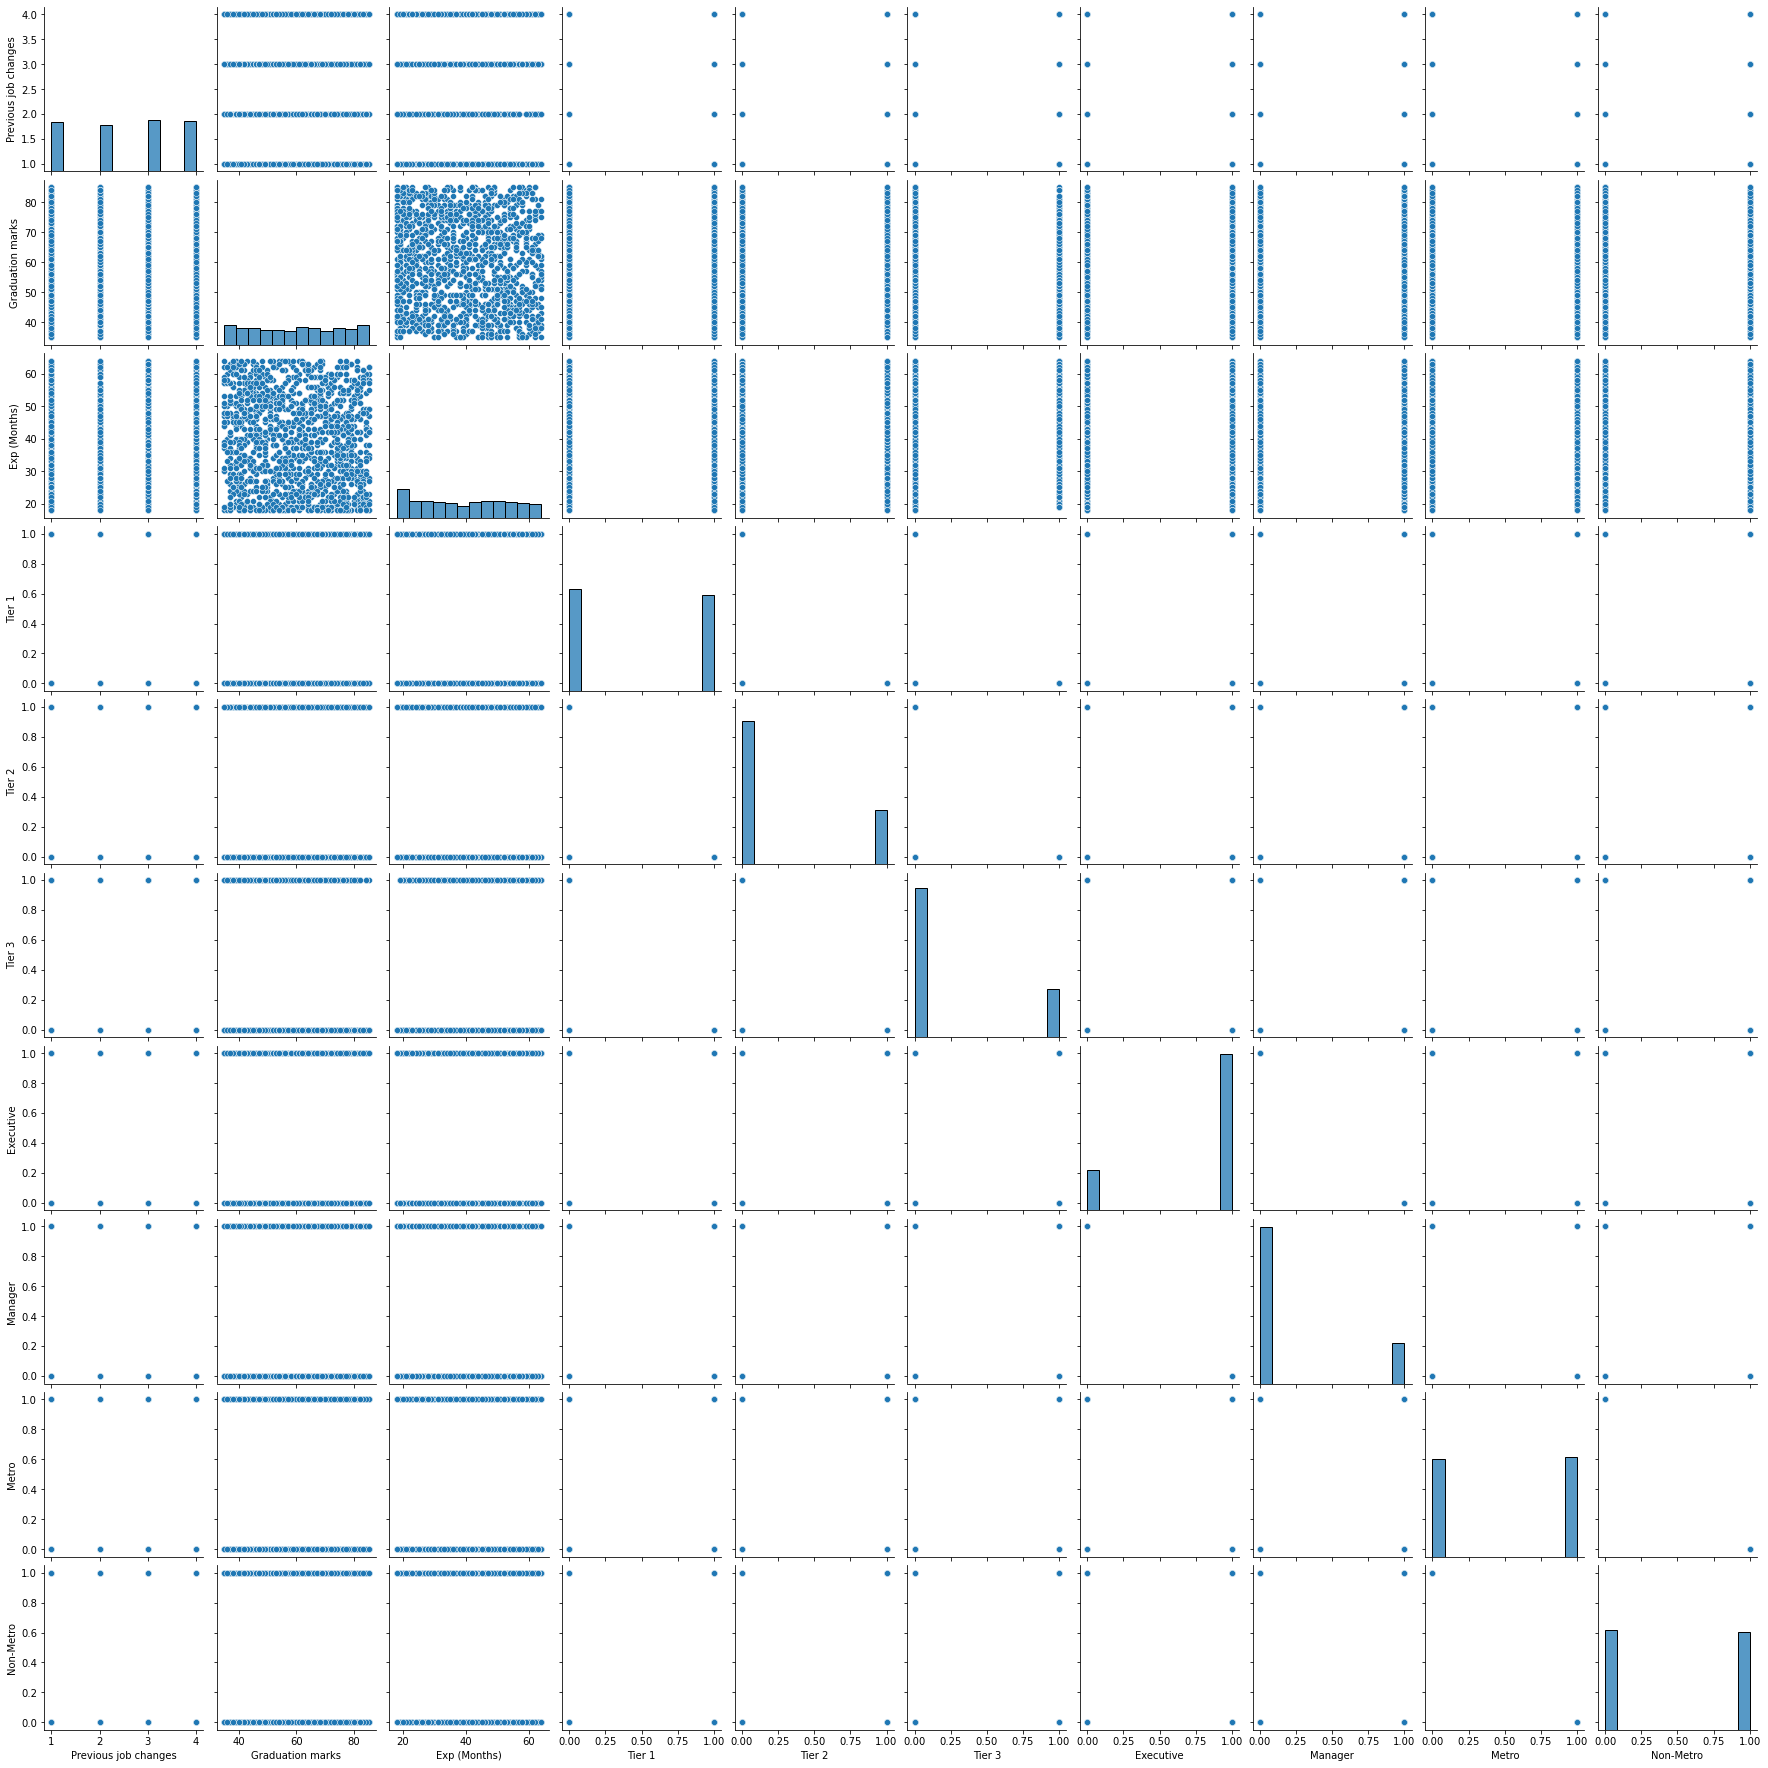

In [24]:
sns.pairplot(data=data)

<AxesSubplot:>

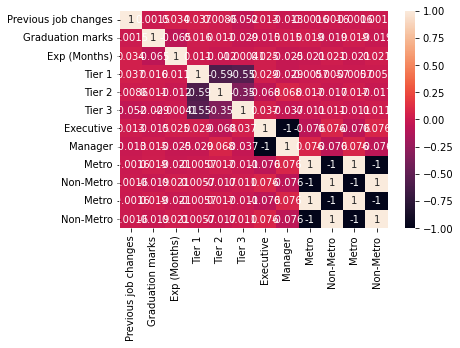

In [39]:
sns.heatmap(data1.corr(),annot=True)

In [41]:
data2=pd.read_csv("C:\\Users\\DELL\\Desktop\\Test_data_file.xlsx - Prediction.csv")
data2

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
data2.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
data2.columns

Index(['College', 'Role', 'City type', 'College_T1', 'College_T2',
       'Role_Manager', 'City_Metro', 'previous CTC', 'previous job changes',
       'Graduation marks', 'Exp', 'Actual CTC', 'Predicted CTC', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [57]:
data2.drop(data2.columns[14:24], axis=1, inplace=True)
data2.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.57653,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.87063,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.02028,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.38688,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.09773,NaN


In [78]:
del data2['Role']
del data2['College']
del data2['City type']
data2.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.57653,NaN
1,0,1,0,1,57081,1,84,18,68005.87063,NaN
2,0,1,0,1,60347,2,52,28,76764.02028,NaN
3,0,0,0,1,49010,2,81,33,82092.38688,NaN
4,0,0,0,1,57879,4,74,32,73878.09773,NaN


In [79]:
#BUILDING LINEAR REGRESSSION MODEL
X = data2[['previous CTC','previous job changes','Graduation marks','Exp','College_T1','College_T2','Role_Manager','City_Metro']]
Y = data2[['Actual CTC']]

In [60]:
X

,previous CTC,previous job changes,Graduation marks,Exp,College_T1,College_T2,Role_Manager,City_Metro
0,55523,3,66,19,1,0,1,0
1,57081,1,84,18,0,1,0,1
2,60347,2,52,28,0,1,0,1
3,49010,2,81,33,0,0,0,1
4,57879,4,74,32,0,0,0,1
...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,0,0,0,1
1334,53714,1,67,18,1,0,0,0
1335,61957,1,47,18,0,1,0,0
1336,53203,3,69,21,1,0,0,0


In [80]:
Y

,Actual CTC
0,71406.57653
1,68005.87063
2,76764.02028
3,82092.38688
4,73878.09773
...,...
1333,69712.40366
1334,69298.75010
1335,66397.77069
1336,64044.38295


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=3)

In [88]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [90]:
predict=lr.predict(X)
data2['Predicted CTC']=predict
data2.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.57653,86838.921602
1,0,1,0,1,57081,1,84,18,68005.87063,66488.085472
2,0,1,0,1,60347,2,52,28,76764.02028,70008.050271
3,0,0,0,1,49010,2,81,33,82092.38688,67532.780185
4,0,0,0,1,57879,4,74,32,73878.09773,71166.018391


In [91]:
predict

array([[86838.92160164],
       [66488.08547222],
       [70008.05027079],
       ...,
       [64181.31769536],
       [66679.89843985],
       [91170.97049232]])

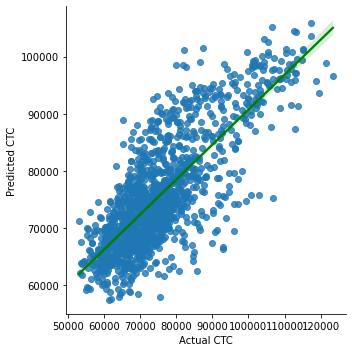

In [93]:
sns.lmplot(x='Actual CTC', y='Predicted CTC', data=data2, line_kws={'color':'green'})